In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 

In [3]:
data=pd.read_csv("../input/adult-income-dataset/adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning

In [5]:
data.shape

(48842, 15)

In [6]:
data=data.drop("fnlwgt",axis=1)

In [7]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
data=data.drop_duplicates()

In [10]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# EDA

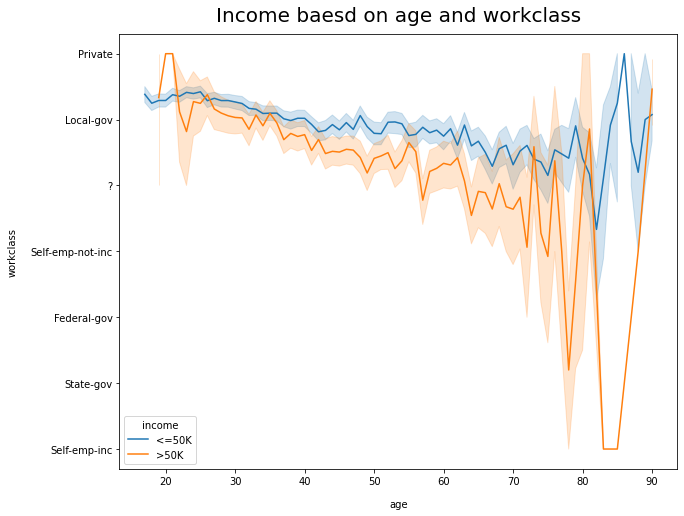

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='workclass', hue='income', data=data)
plt.title("Income baesd on age and workclass", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("workclass", labelpad=13)
ax = plt.gca()

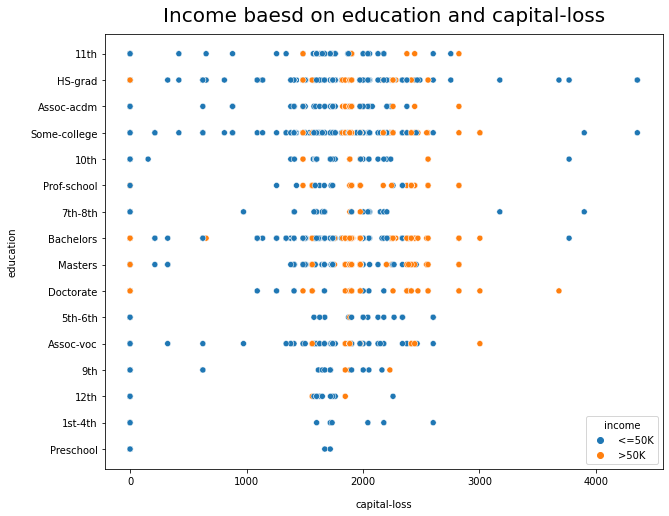

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='capital-loss', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-loss", y=1.015, fontsize=20)
plt.xlabel("capital-loss", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

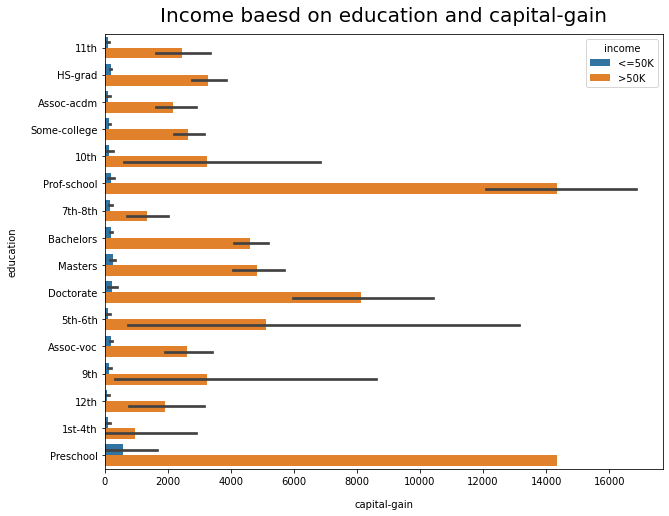

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x='capital-gain', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("capital-gain", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

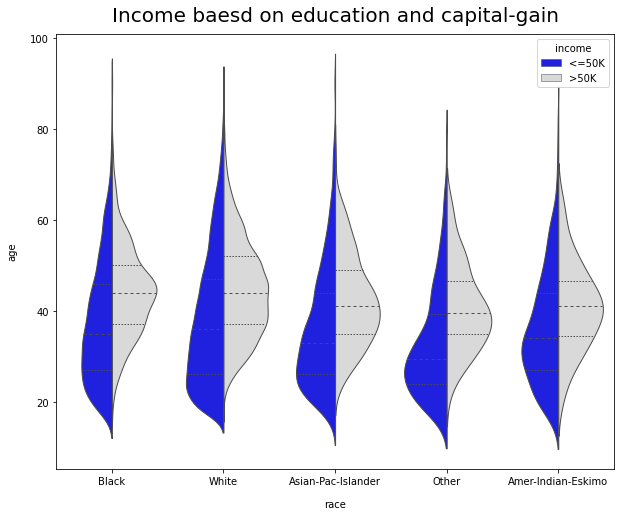

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x="race", y="age", hue="income",
               split=True, inner="quart", linewidth=1,
               palette={"<=50K": "b", ">50K": ".85"})
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("race", labelpad=13)
plt.ylabel("age", labelpad=13)
ax = plt.gca()

# Encoding

In [15]:
data['workclass'].value_counts()

Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [16]:
data['workclass']=data['workclass'].replace("?","None")

In [17]:
data['workclass'].value_counts()

Private             28312
Self-emp-not-inc     3735
Local-gov            3011
None                 2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['workclass'] = label_encoder.fit_transform(data['workclass']) 

In [19]:
data['workclass'].value_counts()

4    28312
6     3735
1     3011
3     2411
7     1927
5     1644
0     1397
8       21
2       10
Name: workclass, dtype: int64

# Education

In [20]:
data['education'].value_counts()

HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education']) 

In [22]:
data['education'].value_counts()

11    12919
15     9188
9      6967
12     2499
8      1961
1      1598
7      1563
0      1277
5       931
14      813
6       737
2       618
10      576
4       498
3       242
13       81
Name: education, dtype: int64

# Marital-status

In [23]:
data['marital-status'].value_counts()

Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [24]:
data['marital-status']=data['marital-status'].map({"Never-married":1,"Separated":2,"Widowed":3,
                                                   "Married-spouse-absent":4,"Married-AF-spouse":5,"Divorced":6,"Married-civ-spouse":7})

In [25]:
data['marital-status'].value_counts()

7    19215
1    13360
6     6218
2     1512
3     1499
4      627
5       37
Name: marital-status, dtype: int64

# occupation

In [26]:
data['occupation'].value_counts()

Prof-specialty       5679
Exec-managerial      5412
Adm-clerical         4813
Sales                4766
Craft-repair         4726
Other-service        4366
Machine-op-inspct    2492
?                    2421
Transport-moving     2071
Handlers-cleaners    1738
Farming-fishing      1434
Tech-support         1351
Protective-serv       944
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [27]:
data['occupation']=data['occupation'].replace("?","None")

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['occupation'] = label_encoder.fit_transform(data['occupation']) 

In [29]:
data['occupation'].value_counts()

10    5679
3     5412
0     4813
12    4766
2     4726
8     4366
6     2492
7     2421
14    2071
5     1738
4     1434
13    1351
11     944
9      240
1       15
Name: occupation, dtype: int64

# relationship

In [30]:
data['relationship'].value_counts()

Husband           16641
Not-in-family     11384
Own-child          5850
Unmarried          4876
Wife               2242
Other-relative     1475
Name: relationship, dtype: int64

In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['relationship'] = label_encoder.fit_transform(data['relationship']) 

In [32]:
data['relationship'].value_counts()

0    16641
1    11384
3     5850
4     4876
5     2242
2     1475
Name: relationship, dtype: int64

# race

In [33]:
data["race"].value_counts()

White                 35541
Black                  4536
Asian-Pac-Islander     1515
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['race'] = label_encoder.fit_transform(data['race']) 

In [35]:
data["race"].value_counts()

4    35541
2     4536
1     1515
0      470
3      406
Name: race, dtype: int64

# gender

In [36]:
data['gender'].value_counts()

Male      27988
Female    14480
Name: gender, dtype: int64

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [38]:
data['gender'].value_counts()

1    27988
0    14480
Name: gender, dtype: int64

# native-country

In [39]:
data['native-country'].value_counts()

United-States                 37492
Mexico                          927
?                               853
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         105
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [40]:
data['native-country']=data['native-country'].replace("?","None")

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['native-country'] = label_encoder.fit_transform(data['native-country'])

In [42]:
data["native-country"].value_counts()

39    37492
25      927
27      853
30      293
10      206
33      184
1       182
7       155
18      151
4       138
8       127
2       122
35      115
22      105
21      105
5       103
23       92
31       87
12       86
40       86
3        85
13       75
32       67
36       65
19       59
11       49
26       49
29       46
6        45
9        38
20       36
16       30
37       30
0        28
38       27
24       23
41       23
28       23
34       21
15       20
17       19
14        1
Name: native-country, dtype: int64

# income

In [43]:
data['income'].value_counts()

<=50K    32020
>50K     10448
Name: income, dtype: int64

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

In [45]:
data['income'].value_counts()

0    32020
1    10448
Name: income, dtype: int64

# Splitting

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x = data[['age','workclass','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','native-country']].values # independent features
y = data['income'].values # y -> target/true labels 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

# Scalling

In [47]:
from sklearn.preprocessing import StandardScaler #scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# KNN Model

In [48]:
for i in [1,2,3,4,5,6,7,8,9,10]: 
  knn = KNeighborsClassifier(i) 
  knn.fit(x_train,y_train) 
  print("K value  : " , i,"train_score;",knn.score(x_train,y_train), "test_score : ", np.mean(cross_val_score(knn, x_train, y_train,cv=10)))
  

K value  :  1 train_score; 0.9495071820230767 test_score :  0.7930838742038598
K value  :  2 train_score; 0.8883170181989437 test_score :  0.8183132377127661
K value  :  3 train_score; 0.8916809634339153 test_score :  0.8176740281193823
K value  :  4 train_score; 0.8763077337100952 test_score :  0.8254445460014965
K value  :  5 train_score; 0.8760049786389478 test_score :  0.8261175953704472
K value  :  6 train_score; 0.8687724963837589 test_score :  0.8294479272628171
K value  :  7 train_score; 0.8678642311703165 test_score :  0.8282705294261182
K value  :  8 train_score; 0.8625828371514112 test_score :  0.8305245414201116
K value  :  9 train_score; 0.8626164766037608 test_score :  0.830659221463336
K value  :  10 train_score; 0.8587815790358932 test_score :  0.8323411035795918


# K=10 Have high test score.so, we use that.

In [49]:
knn=KNeighborsClassifier(10)#knn model taining
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8263872537477435

# Evaluation Metric

In [50]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
knn.score(x_test,y_test) # accuracy

0.8263872537477435

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


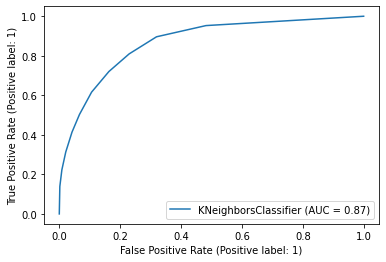

In [51]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn, x_test, y_test)

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(x_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(x_test)

In [53]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
logistic_regression.score(x_test,y_pred)

1.0

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


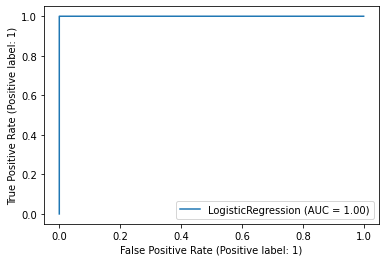

In [54]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(logistic_regression, x_test, y_pred)

# K-Nearest Neighbour AUROC value is 0.87 and Logistic Regression AUROC value is 1. so, we use logistic regression  